In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
json_file = 'data3.json'
with open(json_file, 'r') as f:
    total_result = json.load(f)

# Subplot

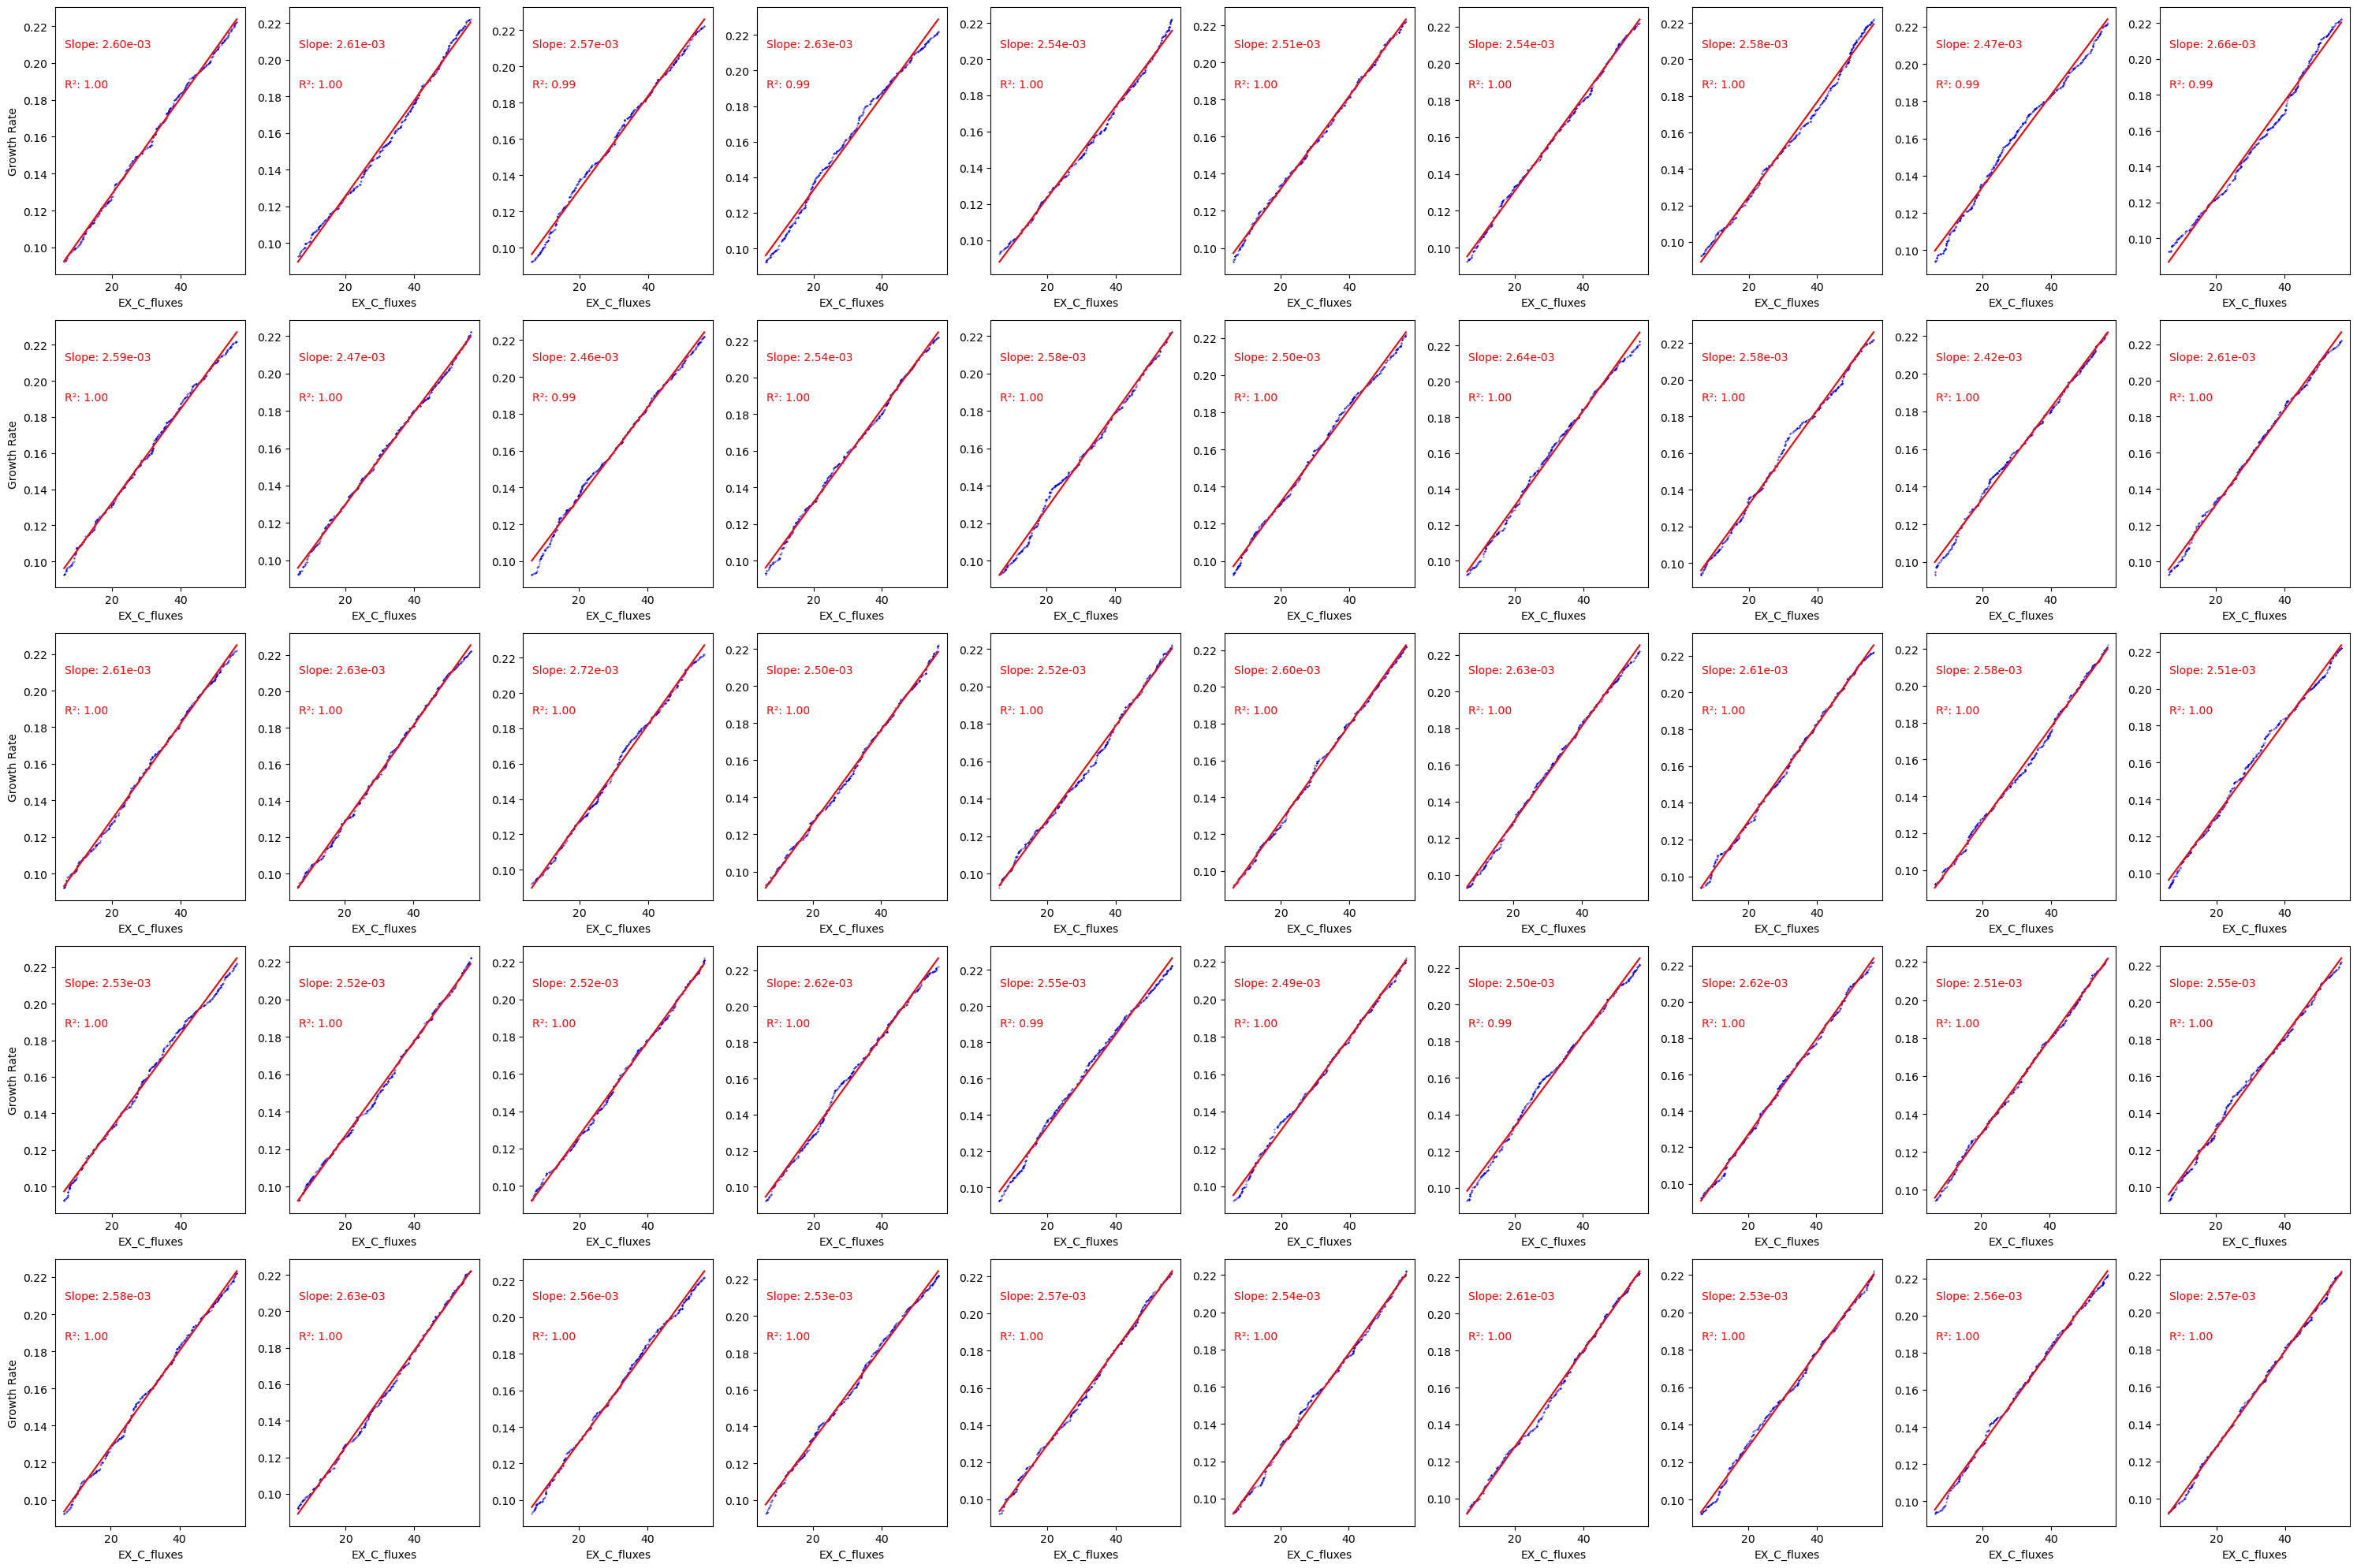

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# 创建一个包含 10 个子图的 2x5 网格
fig, axes = plt.subplots(5, 10, figsize=(30, 20))


# 遍历每个子图并绘制数据
for i, ax in enumerate(axes.flat):
    result = total_result[i]
    x = np.array([point[2] for point in result])
    y1 = np.array([point[1] for point in result])
    #x = np.array([point[3] for point in result])

    ax.scatter(x, y1, label='Data', color='b', s=0.1)
    # 执行线性拟合
    slope, intercept = np.polyfit(x, y1, 1)
    fitted_line = slope * x + intercept

    model = LinearRegression()
    
    # 将数据转换为适当的形状
    x_reshaped = x.reshape(-1, 1)
    
    # 拟合模型
    model.fit(x_reshaped, y1)
    
    # 进行预测
    y_pred = model.predict(x_reshaped)
    
    # 计算R²值
    r2 = r2_score(y1, y_pred)

    ax.plot(x, fitted_line, color='r', label=f'Fit Slope: {slope:.2f}')
    ax.text(0.05, 0.85, f'Slope: {slope:.2e}', transform=ax.transAxes, color='r')
    ax.text(0.05, 0.70, f'R²: {r2:.2f}', transform=ax.transAxes, color='r')

    #ax.set_title(f'Subplot {i+1}')
    ax.set_xlabel('EX_C_fluxes')
    if (i % 10 == 0):
        ax.set_ylabel('Growth Rate')

# 调整子图的布局
plt.tight_layout()

# 显示图形
plt.show()

# Heatmap

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 假设data是一个包含四列数据的DataFrame
# 如果你还没有数据，请替换下面的示例数据
flat_list = [item for sublist in total_result for item in sublist]

In [5]:
flat_list = pd.DataFrame(flat_list)
flat_list.columns=['#Metabolites','Growth_Rate','C_fluxes','N_fluxes','ac_fluxes','index']

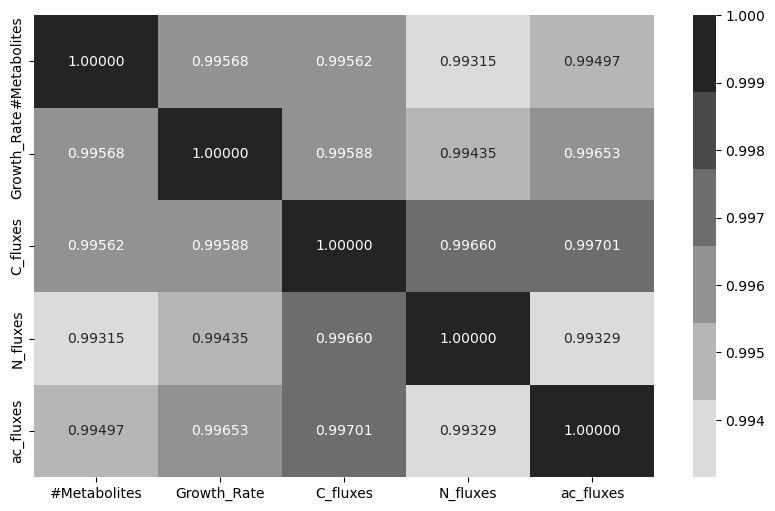

In [6]:
plt.figure(figsize=(10, 6))  # 设置图形大小
heatmap = sns.heatmap(flat_list[['#Metabolites','Growth_Rate','C_fluxes','N_fluxes','ac_fluxes']].corr(), fmt=".5f",annot=True, cmap = sns.color_palette("gray_r"))
plt.show()

(27300,) (27300,)


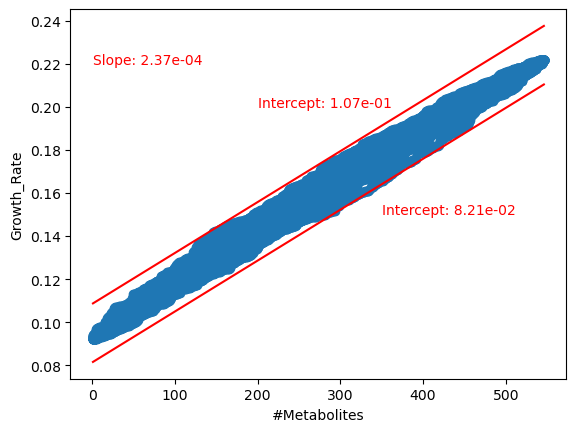

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull

df = flat_list

x = np.array(df['#Metabolites'])
y = np.array(df['Growth_Rate'])
result = np.column_stack((x, y))
print(x.shape, y.shape)

plt.scatter(x, y)
slope, intercept = np.polyfit(x, y, 1)
fitted_line = slope * x + intercept

max_distance = -1
min_distance = 1
farthest_point = None


for xi, yi in result:
    distance = (yi - slope * xi - intercept) 
    if distance > max_distance:
        max_distance = distance
        farthest_point = [xi, yi]
    if distance < min_distance:
        min_distance = distance
        r_farthest_point = [xi, yi]
# plt.plot(x, fitted_line, color='r')
intercept_below = farthest_point[1] - slope * farthest_point[0]
intercept_upper = r_farthest_point[1] - slope * r_farthest_point[0]
plt.plot(x, slope * x + intercept_below*1.01, color = 'r')
plt.plot(x, slope * x + intercept_upper*0.99, color = 'r')
plt.text(0.6,0.22,f'Slope: {slope:.2e}',color='r')
plt.text(200,0.20,f'Intercept: {intercept_below:.2e}',color='r')
plt.text(350,0.15,f'Intercept: {intercept_upper:.2e}',color='r')

plt.xlabel("#Metabolites")
plt.ylabel('Growth_Rate')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

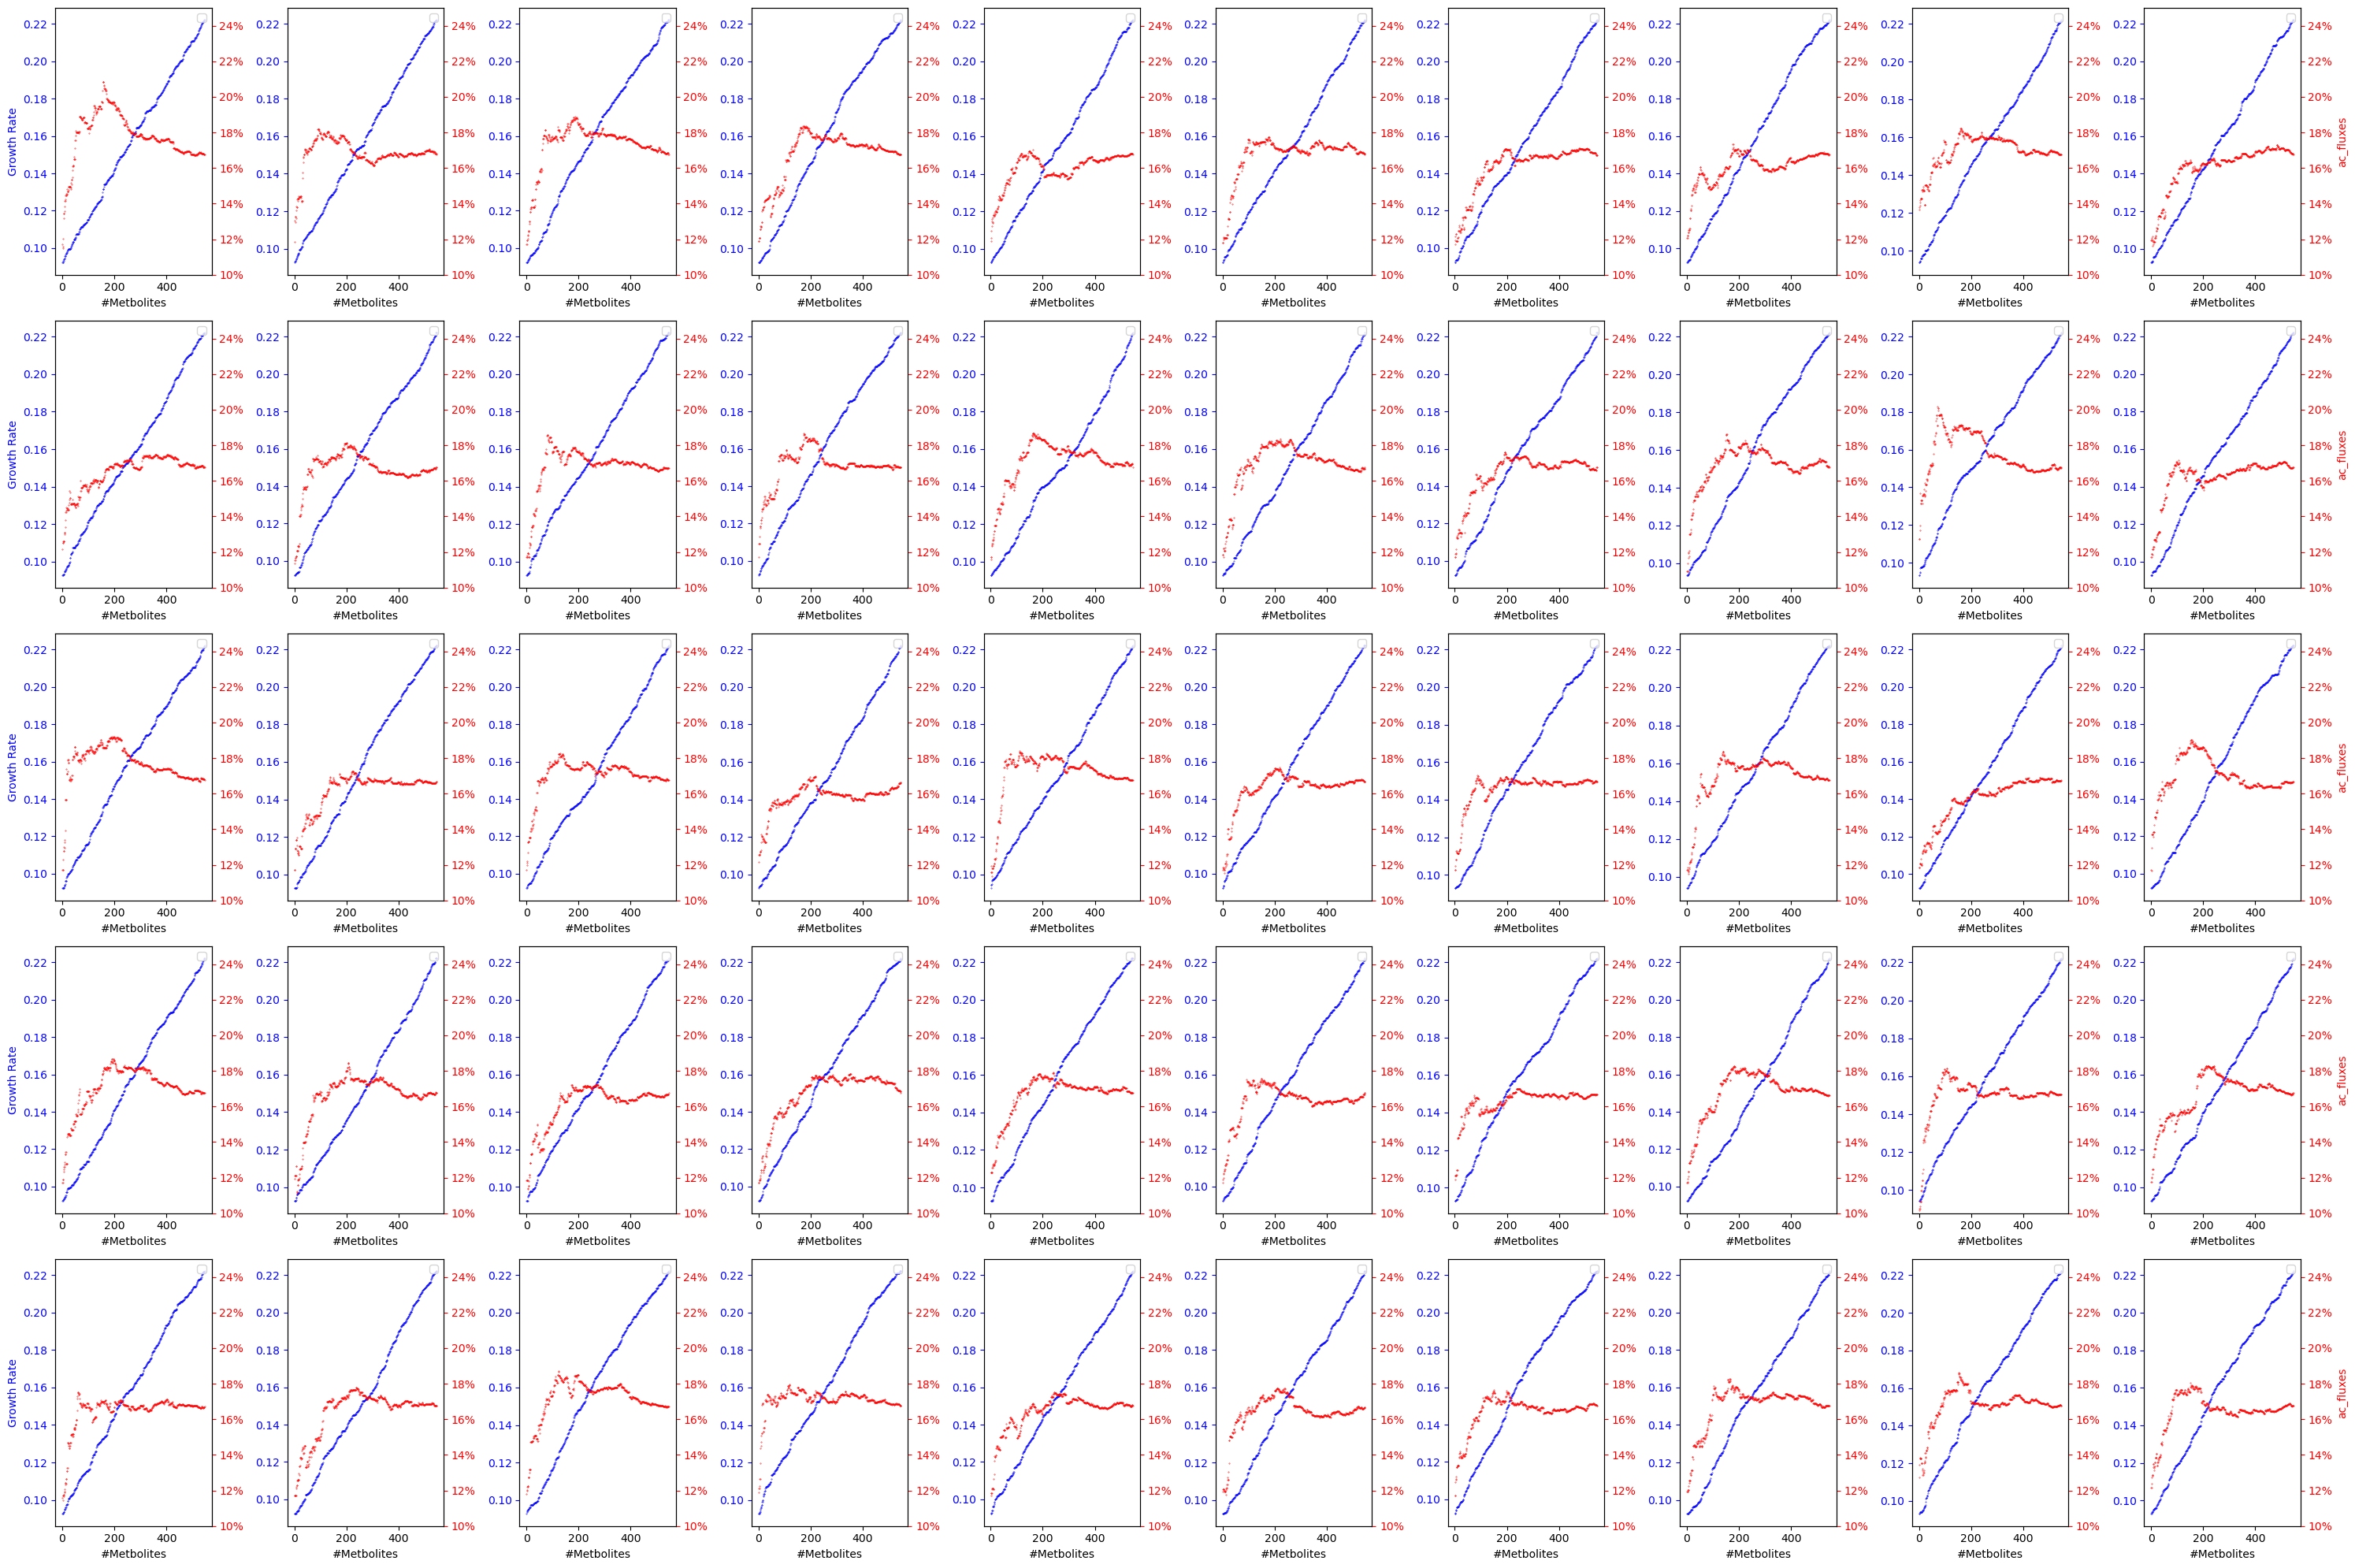

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# 创建一个包含 10 个子图的 2x5 网格
fig, axes = plt.subplots(5, 10, figsize=(30, 20))
'''
point = [count, opt_result.objective_value, C_fluxes, N_fluxes, O_fluxes ,opt_result.fluxes['EX_ac(e)']]
'''

# 遍历每个子图并绘制数据
for i, ax in enumerate(axes.flat):
    result = total_result[i]
    x = np.array([point[0] for point in result])
    y1 = np.array([point[1] for point in result])
    y2 = np.array([((point[4]*2)/point[2]) for point in result])
    #y2 = np.array([(point[4]) for point in result])

    ax.scatter(x, y1, label='Data', color='b', s=0.1)
    ax.set_ylabel('', color='b')
    ax.tick_params('y', colors='b')
    ax.set_xlabel('#Metbolites')
    
    ax2 = ax.twinx()
    ax2.scatter(x, y2, color='r',s=0.1)
    #ax2.set_ylim(0,50)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    ax2.set_ylim(0.1, 0.25)
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
    
    
    ax2.legend(loc='upper right')
    if (i % 10 == 0):
        ax.set_ylabel('Growth Rate')
    if ((i+1) % 10 == 0):
        ax2.set_ylabel('ac_fluxes', color='r')

# 调整子图的布局
plt.tight_layout()
plt.legend()

# 显示图形
plt.show()